In [2]:
import control
import numpy as np
import matplotlib.pyplot as plt

import kontrol
import vishack

data = vishack.data.diaggui.Diaggui("../data/tilt_data.xml")

In [3]:
f = data.get_reference(0)["FHz"]
sts1 = data.get_reference(0)["PSD"].flatten()
sts2 = data.get_reference(2)["PSD"].flatten()
sts3 = data.get_reference(4)["PSD"].flatten()
sts4 = data.get_reference(6)["PSD"].flatten()
sts5 = data.get_reference(8)["PSD"].flatten()
sts6 = data.get_reference(10)["PSD"].flatten()
sts7 = data.get_reference(12)["PSD"].flatten()

gs13_1 = data.get_reference(1)["PSD"].flatten()
gs13_2 = data.get_reference(3)["PSD"].flatten()
gs13_3 = data.get_reference(5)["PSD"].flatten()
gs13_4 = data.get_reference(7)["PSD"].flatten()
gs13_5 = data.get_reference(9)["PSD"].flatten()
gs13_6 = data.get_reference(11)["PSD"].flatten()
gs13_7 = data.get_reference(13)["PSD"].flatten()

sts1 *= 1/(2*np.pi*f) * 1e-9
sts2 *= 1/(2*np.pi*f) * 1e-9
sts3 *= 1/(2*np.pi*f) * 1e-9
sts4 *= 1/(2*np.pi*f) * 1e-9
sts5 *= 1/(2*np.pi*f) * 1e-9
sts6 *= 1/(2*np.pi*f) * 1e-9
sts7 *= 1/(2*np.pi*f) * 1e-9

s = control.tf("s")
wn = 1*2*np.pi
q = 1/np.sqrt(2)
gs13_cal = (s**2 + wn/q*s + wn**2) / (s**3) * 1e-9

gs13_1 *= abs(gs13_cal(1j*2*np.pi*f))
gs13_2 *= abs(gs13_cal(1j*2*np.pi*f)) 
gs13_3 *= abs(gs13_cal(1j*2*np.pi*f))
gs13_4 *= abs(gs13_cal(1j*2*np.pi*f))
gs13_5 *= abs(gs13_cal(1j*2*np.pi*f))
gs13_6 *= abs(gs13_cal(1j*2*np.pi*f))
gs13_7 *= abs(gs13_cal(1j*2*np.pi*f))

In [4]:
import scipy.io

t120h = scipy.io.loadmat("../data/t120h.mat")["n_t120h"].flatten()
f_ = np.logspace(-3, 3, 1024)
f__ = np.logspace(-4, 3, 1024)

In [5]:
def sts_model(f, na, a):
    noise = na/f**a
    return noise

def gs13_model(f, na, nb, a, b):
    noise = ((na/f**a)**2 + (nb/f**b)**2)**0.5
    return noise

def tilt_model(f, na, nb, a, b):
    return 1/gs13_model(f, na, nb, a, b)

In [6]:
(-8.825-9.825)/2

-9.325

In [23]:
sts_low_args = [10**-9.825 ,2.5]
sts_mid_args = [10**-9.325 ,2.5]
sts_high_args = [10**-8.825 ,2.5]
sts_low = sts_model(f_, *sts_low_args)
sts_mid = sts_model(f_, *sts_mid_args)
sts_high = sts_model(f_, *sts_high_args)

sts_low = (sts_low**2 + t120h**2)**0.5
sts_mid = (sts_mid**2 + t120h**2)**0.5
sts_high = (sts_high**2 + t120h**2)**0.5


gs13_args = [1*10**-11.125, 1*10**-11.375, 3.5, 1.15]
# gs13_low_args = [1*10**-11.125, 1*10**-11.375, 3.5, 1.15]
gs13_low_args = [1*10**-10.625, 1*10**-11.375, 3.5, 1.15]
gs13_mid_args = [1*10**-10.125, 1*10**-11.375, 3.5, 1.15]
gs13_high_args = [1*10**-9.625, 1*10**-11.375, 3.5, 1.15]



tilt_low_args = [1*10**13, 1*10**8.875, -6, -2.1]
tilt_mid_args = [1*10**13, 1*10**8.4375, -6, -2.1]
tilt_high_args = [1*10**13, 1*10**8, -6, -2.1]

tilt_low = tilt_model(f__, *tilt_low_args)
tilt_mid = tilt_model(f__, *tilt_mid_args)
tilt_high = tilt_model(f__, *tilt_high_args)

gs13_low = gs13_model(f__, *gs13_low_args)
gs13_mid = gs13_model(f__, *gs13_mid_args)
gs13_high = gs13_model(f__, *gs13_high_args)


# gs13_low = (gs13**2 + tilt_low**2)**0.5
# gs13_mid = (gs13**2 + tilt_mid**2)**0.5

# gs13_high = (gs13**2 + tilt_high**2)**0.5

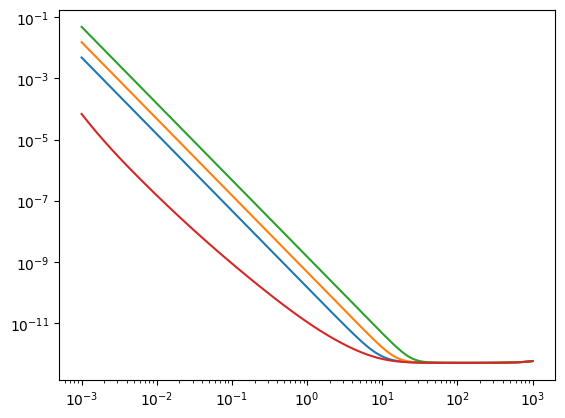

In [8]:
# plt.loglog(f, sts1)
# plt.loglog(f, sts2)
# plt.loglog(f, sts3)
# plt.loglog(f, sts4)
# plt.loglog(f, sts5)
# plt.loglog(f, sts6)
# plt.loglog(f, sts7)
plt.loglog(f_, sts_low)
plt.loglog(f_, sts_mid)
plt.loglog(f_, sts_high)
plt.plot(f_, t120h)
# plt.loglog(f, sts_model(f, 10**-8.825 ,2.5))
# plt.loglog(f, sts_model(f, 10**-9.825 ,2.5))


# plt.loglog(f_[f_<10], tilt_low[f_<10])
# plt.loglog(f_[f_<10], tilt_mid[f_<10])
# plt.loglog(f_[f_<10], tilt_high[f_<10])


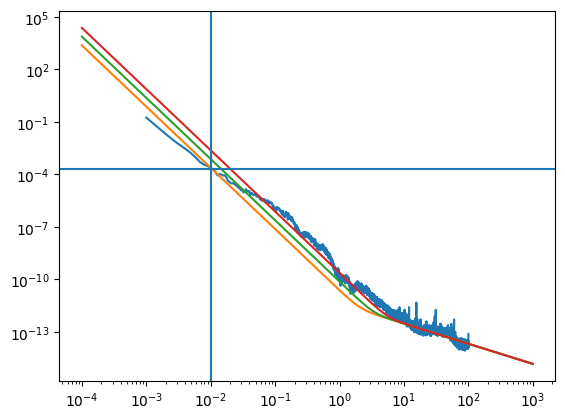

In [24]:
# plt.loglog(f, gs13_1)
# plt.loglog(f, gs13_2)
plt.loglog(f, gs13_3)
# plt.loglog(f, gs13_4)
# plt.loglog(f, gs13_5)
# plt.loglog(f, gs13_6)
# plt.loglog(f, gs13_7)
# plt.loglog(f__, gs13)
plt.loglog(f__, gs13_low)
plt.loglog(f__, gs13_mid)
plt.loglog(f__, gs13_high)
plt.axhline(2e-4)
plt.axvline(1e-2, ymin=1e-13, ymax=1e3)

In [26]:
f_lower = 2e-3
f_upper = 100
sts_low_pad = sts_low.copy()
sts_low_pad[f_<f_lower] = sts_low[f_>=f_lower][0]
sts_low_pad[f_>f_upper] = sts_low[f_<=f_upper][-1]

sts_mid_pad = sts_mid.copy()
sts_mid_pad[f_<f_lower] = sts_mid[f_>=f_lower][0]
sts_mid_pad[f_>f_upper] = sts_mid[f_<=f_upper][-1]

sts_high_pad = sts_high.copy()
sts_high_pad[f_<f_lower] = sts_high[f_>=f_lower][0]
sts_high_pad[f_>f_upper] = sts_high[f_<=f_upper][-1]

In [27]:
gs13_low_pad = gs13_low.copy()
gs13_low_pad[f__<f_lower] = gs13_low[f__>=f_lower][0]
gs13_low_pad[f__>f_upper] = gs13_low[f__<=f_upper][-1]

gs13_mid_pad = gs13_mid.copy()
gs13_mid_pad[f__<f_lower] = gs13_mid[f__>=f_lower][0]
gs13_mid_pad[f__>f_upper] = gs13_mid[f__<=f_upper][-1]

gs13_high_pad = gs13_high.copy()
gs13_high_pad[f__<f_lower] = gs13_high[f__>=f_lower][0]
gs13_high_pad[f__>f_upper] = gs13_high[f__<=f_upper][-1]

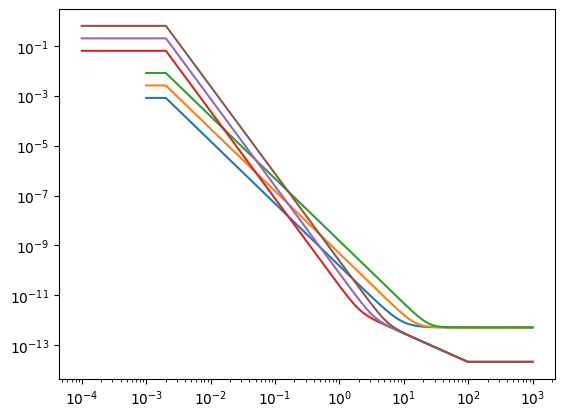

In [28]:
plt.loglog(f_, sts_low_pad)
plt.loglog(f_, sts_mid_pad)
plt.loglog(f_, sts_high_pad)

plt.loglog(f__, gs13_low_pad)
plt.loglog(f__, gs13_mid_pad)
plt.loglog(f__, gs13_high_pad)


In [20]:
tf_sts_low = kontrol.curvefit.spectrum_fit(f=f_, spectrum=sts_low_pad, nzero=4, npole=4)

In [22]:
tf_sts_mid = kontrol.curvefit.spectrum_fit(f=f_, spectrum=sts_mid_pad, nzero=4, npole=4)

In [25]:
tf_sts_high = kontrol.curvefit.spectrum_fit(f=f_, spectrum=sts_high_pad, nzero=4, npole=4)

In [29]:
tf_gs13_low = kontrol.curvefit.spectrum_fit(f=f__, spectrum=gs13_low_pad, nzero=4, npole=4)

In [30]:
tf_gs13_mid = kontrol.curvefit.spectrum_fit(f=f__, spectrum=gs13_mid_pad, nzero=4, npole=4)

In [31]:
tf_gs13_high = kontrol.curvefit.spectrum_fit(f=f__, spectrum=gs13_high_pad, nzero=4, npole=4)

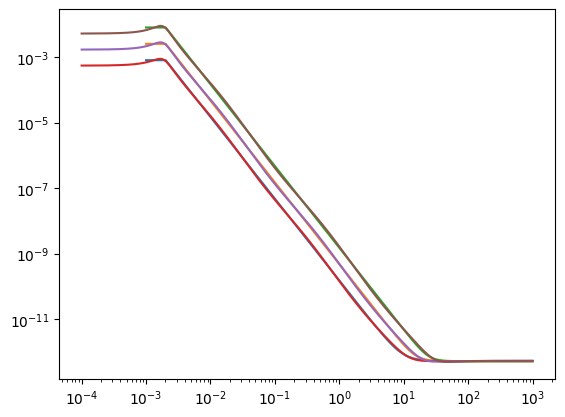

In [26]:
f__ = np.logspace(-4, 3, 1024)

plt.loglog(f_, sts_low_pad)
plt.loglog(f_, sts_mid_pad)
plt.loglog(f_, sts_high_pad)

plt.loglog(f__, abs(tf_sts_low(1j*2*np.pi*f__)))
plt.loglog(f__, abs(tf_sts_mid(1j*2*np.pi*f__)))
plt.loglog(f__, abs(tf_sts_high(1j*2*np.pi*f__)))

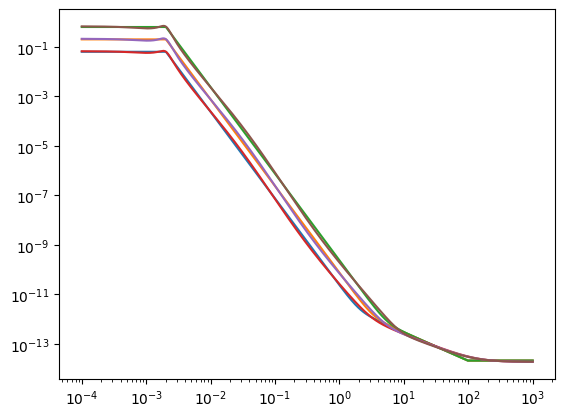

In [32]:
f__ = np.logspace(-4, 3, 1024)

plt.loglog(f__, gs13_low_pad)
plt.loglog(f__, gs13_mid_pad)
plt.loglog(f__, gs13_high_pad)

plt.loglog(f__, abs(tf_gs13_low(1j*2*np.pi*f__)))
plt.loglog(f__, abs(tf_gs13_mid(1j*2*np.pi*f__)))
plt.loglog(f__, abs(tf_gs13_high(1j*2*np.pi*f__)))

In [33]:
# tf_sts_low.save("noise_models/sts_low.pkl")
# tf_sts_mid.save("noise_models/sts_mid.pkl")
# tf_sts_high.save("noise_models/sts_high.pkl")

tf_gs13_low.save("noise_models/gs13_low.pkl")
tf_gs13_mid.save("noise_models/gs13_mid.pkl")
tf_gs13_high.save("noise_models/gs13_high.pkl")